In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [44]:
df = pd.read_csv('data\stud.csv')

In [45]:
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [46]:
X = df.drop('math_score', axis = 1)
y = df['math_score']

In [47]:
print('Categories in gender variable:   ', end = ' ')
print(df['gender'].unique())

print('Categories in race_ethnicity variable:   ', end = ' ')
print(df['gender'].unique())

print('Categories in parental_level_of_education variable:   ', end = ' ')
print(df['gender'].unique())

print('Categories in lunch variable:   ', end = ' ')
print(df['gender'].unique())

print('Categories in test_preparation_course variable:   ', end = ' ')
print(df['gender'].unique())

Categories in gender variable:    ['female' 'male']
Categories in race_ethnicity variable:    ['female' 'male']
Categories in parental_level_of_education variable:    ['female' 'male']
Categories in lunch variable:    ['female' 'male']
Categories in test_preparation_course variable:    ['female' 'male']


In [48]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer    # use to transform columns or data points

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocess = ColumnTransformer(                            
    [('OneHotEncoder', one_hot_transformer, cat_features),
     ('StandardScaler', numeric_transformer, num_features),]
)

In [49]:
X = preprocess.fit_transform(X)

In [50]:
X.shape

(1000, 19)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [52]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, test_pred)

    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])

    print('Performance of Model for training set')
    print(f'Mean Absolute Error: {model_train_mae}')
    print(f'Root mean squared errr: {model_train_rmse}')
    print(f'R2 Score: {model_train_r2}')
    print('---------------------------')
    print('Performance of Model for test set')
    print(f'Mean Absolute Error: {model_test_mae}')
    print(f'Root mean squared errr: {model_test_rmse}')
    print(f'R2 Score: {model_test_r2}')
    r2_list.append(model_test_r2)
    print('\n')

Linear Regression
Performance of Model for training set
Mean Absolute Error: 4.227421875
Root mean squared errr: 5.3275572461436305
R2 Score: 0.8784732801014525
---------------------------
Performance of Model for test set
Mean Absolute Error: 4.3428125
Root mean squared errr: 5.388520422504679
R2 Score: 0.862347961659728


Lasso
Performance of Model for training set
Mean Absolute Error: 5.1433198436486895
Root mean squared errr: 6.551062970535262
R2 Score: 0.8162450385339813
---------------------------
Performance of Model for test set
Mean Absolute Error: 5.243647829733857
Root mean squared errr: 6.471076130248418
R2 Score: 0.8014835049484342


Ridge
Performance of Model for training set
Mean Absolute Error: 4.214173855641372
Root mean squared errr: 5.312356813933704
R2 Score: 0.8791657638458001
---------------------------
Performance of Model for test set
Mean Absolute Error: 4.371787571326673
Root mean squared errr: 5.412562627945164
R2 Score: 0.8611168847385756


K-Neighbors Regre

In [54]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model_name', 'R2_score']).sort_values(by=['R2_score'], ascending = False)

,Model_name,R2_score
0,Linear Regression,0.862348
2,Ridge,0.861117
7,CatBoosting Regressor,0.827945
8,AdaBoost Regressor,0.820590
5,Random Forest Regressor,0.817170
1,Lasso,0.801484
6,XGBRegressor,0.796809
3,K-Neighbors Regressor,0.775255
4,Decision Tree,0.621976


In [55]:
model1 = Ridge()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2_score = r2_score(y_pred , y_test)*100
print("Accuracy of the model is %.2f" %r2_score)

Accuracy of the model is 85.38


Text(0, 0.5, 'predicted')

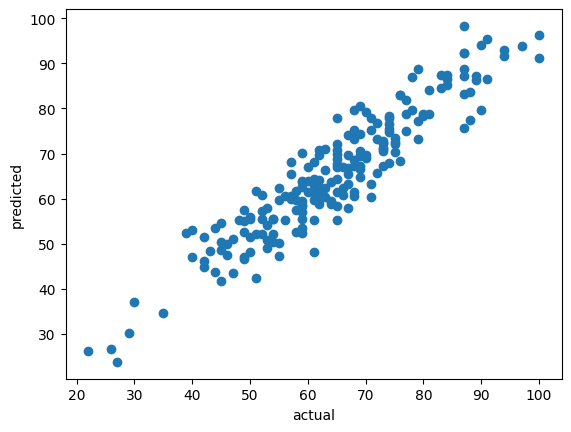

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

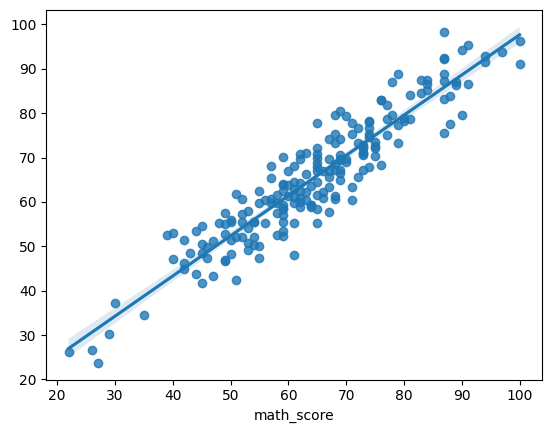

In [58]:
sns.regplot(x = y_test, y= y_pred)

In [61]:
prediction_df = pd.DataFrame({'real_values': y_test, 'predicted_values':y_pred, 'difference': y_test - y_pred})

In [62]:
prediction_df

,real_values,predicted_values,difference
726,65,70.7500,-5.7500
243,59,58.6250,0.3750
342,69,64.8750,4.1250
976,60,61.3750,-1.3750
919,91,95.4375,-4.4375
...,...,...,...
458,100,96.1875,3.8125
169,67,57.8125,9.1875
297,71,77.8125,-6.8125
10,58,59.7500,-1.7500
